In [ ]:
!pip install kaggle

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d prathamgrover/brain-tumor-classification

100% 86.8M/86.8M [00:05<00:00, 19.3MB/s]
100% 86.8M/86.8M [00:05<00:00, 17.8MB/s]


In [ ]:
!unzip /content/brain-tumor-classification.zip

In [4]:
import os
import cv2
import random
import time

import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.models import *


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, top_k_accuracy_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [51]:
import os
import cv2
import random
import shutil
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [5]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [ ]:
len(os.listdir('/content/brain-tumor-classification'))


2

In [ ]:
data_path = "/content/brain-tumor-classification"


In [30]:
import os

In [37]:
train_dir = '/content/brain-tumor-classification/Training'
validation_dir = '/content/brain-tumor-classification/Testing'

In [38]:
classes = os.listdir(train_dir)
print(classes)

['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor']


In [35]:
train_dir

'/content/brain-tumor-classification/Training'

In [33]:
import tqdm

In [39]:
import os
import cv2
from tqdm import tqdm  # Import tqdm correctly

X = []
y = []
image_size = 150
for i in classes:
    folderPath = os.path.join(train_dir, i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(i)

for i in classes:
    folderPath = os.path.join(validation_dir, i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(i)

X = np.array(X)
y = np.array(y)


100%|██████████| 105/105 [00:00<00:00, 689.65it/s]


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)


In [41]:
y_train_new = []
for i in y_train:
    y_train_new.append(classes.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(classes.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [42]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

img_datagen.fit(X_train)
img_datagen.fit(X_test)

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [44]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [45]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

In [46]:
model_vgg16 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [48]:
history = model_vgg16.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 17s 139ms/step - loss: 1.4192 - accuracy: 0.6335 - val_loss: 0.7887 - val_accuracy: 0.7305
Epoch 2/10
82/82 [==============================] - 7s 81ms/step - loss: 0.3682 - accuracy: 0.8725 - val_loss: 0.4827 - val_accuracy: 0.8423
Epoch 3/10
82/82 [==============================] - 7s 80ms/step - loss: 0.1793 - accuracy: 0.9441 - val_loss: 0.4841 - val_accuracy: 0.8530
Epoch 4/10
82/82 [==============================] - 6s 79ms/step - loss: 0.0980 - accuracy: 0.9789 - val_loss: 0.4373 - val_accuracy: 0.8530
Epoch 5/10
82/82 [==============================] - 7s 80ms/step - loss: 0.0589 - accuracy: 0.9946 - val_loss: 0.4138 - val_accuracy: 0.8698
Epoch 6/10
82/82 [==============================] - 7s 80ms/step - loss: 0.0408 - accuracy: 0.9973 - val_loss: 0.4054 - val_accuracy: 0.8698
Epoch 7/10
82/82 [==============================] - 8s 96ms/step - loss: 0.0307 - accuracy: 0.9992 - val_loss: 0.4018 - val_accuracy: 0.8698
Epoch 8/10


In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

In [53]:
import matplotlib.pyplot as plt

def plot_acc_model(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_loss_model(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


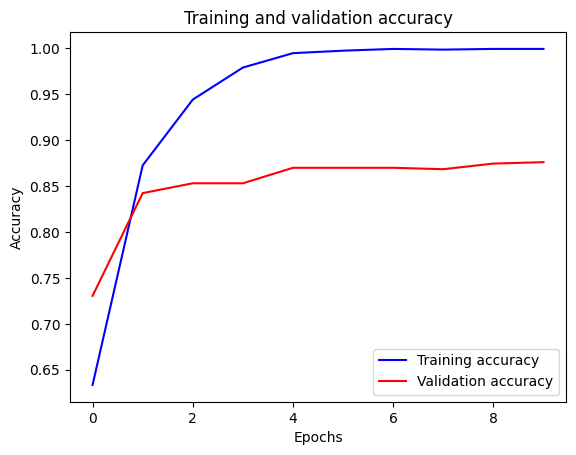

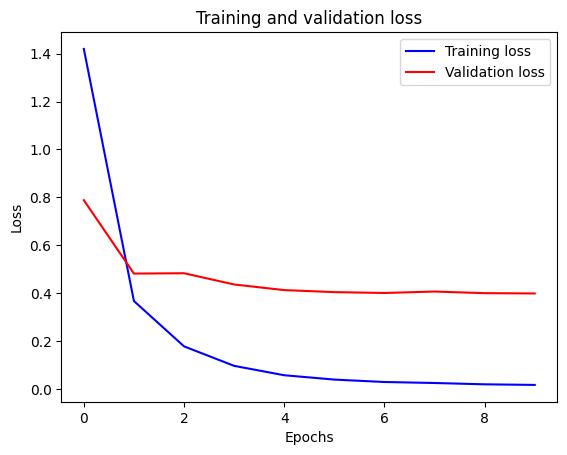

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)


In [55]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [56]:
# Load pre-trained ResNet-152 model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

234698864/234698864 [==============================] - 11s 0us/step


In [57]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

In [58]:
model_resnet152 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
model_resnet152.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_resnet152.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

# Define the model
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the pre-trained ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_resnet50.summary()

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/brain-tumor-classification/Training/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/brain-tumor-classification/Testing/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model_resnet50.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


In [62]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Add Dropout and BatchNormalization layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = BatchNormalization()(x)  # Add BatchNormalization layer
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout layer
x = BatchNormalization()(x)  # Add BatchNormalization layer
output = Dense(4, activation='softmax')(x)

# Define the model
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model_resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and data augmentation
history = model_resnet50.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Increase number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


90/90 [==============================] - 38s 424ms/step - loss: 1.3826 - accuracy: 0.3808 - val_loss: 2.3106 - val_accuracy: 0.2716
Epoch 24/30
90/90 [==============================] - 23s 258ms/step - loss: 1.3735 - accuracy: 0.3868 - val_loss: 2.2729 - val_accuracy: 0.3071
Epoch 25/30
48/90 [===============>..............] - ETA: 10s - loss: 1.3803 - accuracy: 0.3604

KeyboardInterrupt: 

In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import EfficientNetB0

# Load pre-trained EfficientNetB0 model without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

# Define the model
model_efficientnet = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the pre-trained EfficientNetB0 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_efficientnet.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_efficientnet.summary()

# Train the model
history = model_efficientnet.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=1
)



16705208/16705208 [==============================] - 2s 0us/step
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_11[0][0]']            
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)   

In [ ]:
def create_dfs(data_path):
    # Initialize two empty DataFrames, one for training and one for testing
    df_train = pd.DataFrame(columns=['path', 'label'])
    df_test = pd.DataFrame(columns=['path', 'label'])

    # Define the main folders
    main_folders = ['Training']

    for folder in main_folders:
        type_path = os.path.join(data_path, folder)
        if not os.path.isdir(type_path):  # Skip if not a directory
            continue
        classes = os.listdir(type_path)

        for cls in classes:
            class_path = os.path.join(type_path, cls)
            if not os.path.isdir(class_path):  # Skip if not a directory
                continue
            images = os.listdir(class_path)

            for img in images:
                img_path = os.path.join(class_path, img)
                # Append to the appropriate DataFrame based on the folder
                if folder == 'Training':
                    df_train = df_train._append({'path': img_path, 'label': cls}, ignore_index=True)
                elif folder == 'Testing':
                    df_test = df_test._append({'path': img_path, 'label': cls}, ignore_index=True)

    return df_train, df_test

df_train, df_test = create_dfs(data_path)


In [ ]:
print("Training DataFrame:")
print(df_train.head())
print("\nTesting DataFrame:")
print(df_test.head())

Training DataFrame:
                                                path            label
0  /content/brain-tumor-classification/Training/p...  pituitary_tumor
1  /content/brain-tumor-classification/Training/p...  pituitary_tumor
2  /content/brain-tumor-classification/Training/p...  pituitary_tumor
3  /content/brain-tumor-classification/Training/p...  pituitary_tumor
4  /content/brain-tumor-classification/Training/p...  pituitary_tumor

Testing DataFrame:
                                                path            label
0  /content/brain-tumor-classification/Testing/pi...  pituitary_tumor
1  /content/brain-tumor-classification/Testing/pi...  pituitary_tumor
2  /content/brain-tumor-classification/Testing/pi...  pituitary_tumor
3  /content/brain-tumor-classification/Testing/pi...  pituitary_tumor
4  /content/brain-tumor-classification/Testing/pi...  pituitary_tumor


In [15]:
from pathlib import Path

# Define the path to the folder
folder_path = '/content/Training/'

# Create lists of image files for each class
glioma_tumor = list(Path(folder_path + 'glioma_tumor').glob('*.jpg'))
meningioma_tumor = list(Path(folder_path + 'meningioma_tumor').glob('*.jpg'))
no_tumor = list(Path(folder_path + 'no_tumor').glob('*.jpg'))
pituitary_tumor = list(Path(folder_path + 'pituitary_tumor').glob('*.jpg'))

# Print the length of each list to verify
print("Glioma Tumor:", len(glioma_tumor))
print("Meningioma Tumor:", len(meningioma_tumor))
print("No Tumor:", len(no_tumor))
print("Pituitary Tumor:", len(pituitary_tumor))


Glioma Tumor: 826
Meningioma Tumor: 822
No Tumor: 395
Pituitary Tumor: 827


In [24]:
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory("/content/Training/",
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True,
                                            subset='training')

test_data = train_gen.flow_from_directory("/content/Training/",
                                           target_size=(224, 224),
                                           batch_size=1,
                                           shuffle=False,
                                           subset='validation')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [ ]:
glioma_tumor

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model with pre-trained weights
inception = InceptionV3(input_shape=(299, 299, 3),
                        include_top=True,
                        weights='imagenet')

# Define a Sequential model
model = Sequential()

# Add an input layer with the specified input shape
model.add(Input(shape=(299,299,3)))

# Add the pre-trained InceptionV3 model as a layer in the Sequential model
model.add(inception)

# Flatten the output of the InceptionV3 model
model.add(Flatten())

# Add a dense layer with 1024 units and ReLU activation
model.add(Dense(1024, activation="relu"))

# Add another dense layer with 512 units and ReLU activation
model.add(Dense(512, activation="relu"))

# Add the output layer with 5 units (assuming 5 classes) and softmax activation
model.add(Dense(5, activation="softmax", name="classification"))

# Print the summary of the model
model.summary()

96112376/96112376 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1000)              23851784  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1025024   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 5)                 2565      
                                                                 
Total params: 25404173 (96.91 MB)
Trainable params: 25369741 (96.78 MB)
Non-trainable params: 34432 (134.50 KB)
___________

In [27]:
model.compile(optimizer='SGD',
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [28]:
history = model.fit(train_data , validation_data = test_data , epochs = 5)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-28-d6dc29b10c76>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,4]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_21814]

In [18]:
from sklearn.model_selection import train_test_split

# Combine all image paths and corresponding labels
all_image_paths = glioma_tumor + meningioma_tumor + no_tumor + pituitary_tumor
labels = ['glioma_tumor'] * len(glioma_tumor) + ['meningioma_tumor'] * len(meningioma_tumor) + ['no_tumor'] * len(no_tumor) + ['pituitary_tumor'] * len(pituitary_tumor)

# Split the data into training and testing sets
train_paths, test_paths, train_labels, test_labels = train_test_split(all_image_paths, labels, test_size=0.2, random_state=42)

# Print the number of samples in each set
print("Number of training samples:", len(train_paths))
print("Number of testing samples:", len(test_paths))


Number of training samples: 2296
Number of testing samples: 574


In [ ]:
train_paths

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

# Load and preprocess images for training
train_images = []
train_labels = []

for path, label in zip(train_paths, train_labels):
    img = load_img(path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
    train_images.append(img_array)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Load and preprocess images for testing
test_images = []
test_labels = []

for path, label in zip(test_paths, test_labels):
    img = load_img(path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
    test_images.append(img_array)
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Shuffle training data
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# Load VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_labels
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Classification Report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)


ValueError: Expected input data to be non-empty.

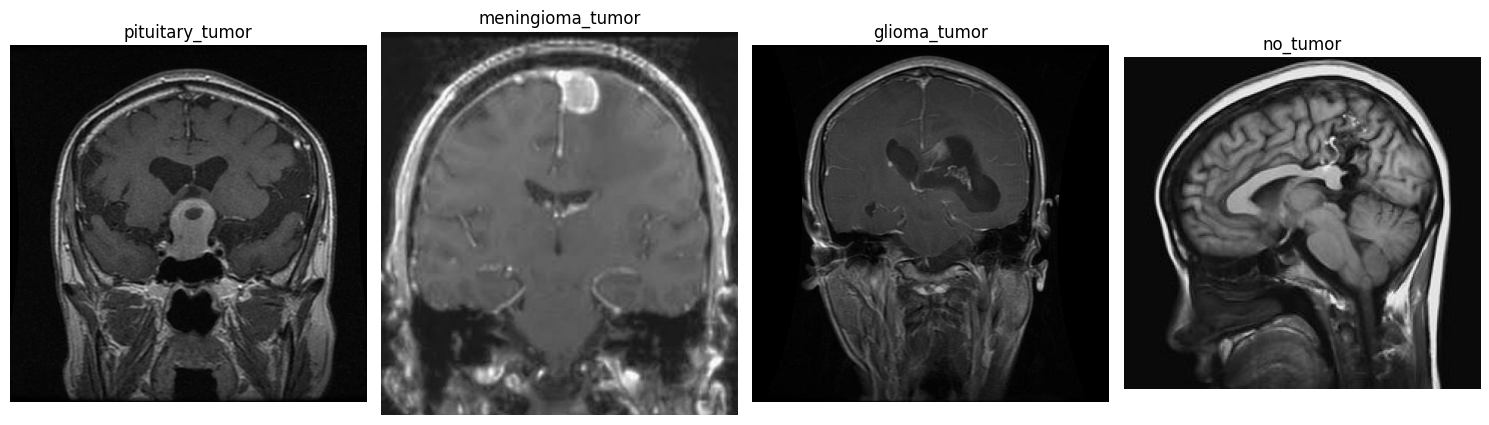

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming df_train is your training DataFrame
unique_labels = df_train['label'].unique()

# Set the number of unique classes
n_unique_labels = len(unique_labels)

# Create a figure with subplots - one for each unique label
fig, axs = plt.subplots(1, n_unique_labels, figsize=(15, 5))

# Iterate over each unique label, find the first occurrence, and plot it
for i, label in enumerate(unique_labels):
    # Find the first image path for the current label
    img_path = df_train[df_train['label'] == label].iloc[0]['path']
    img = mpimg.imread(img_path)

    # If there's only one unique label, `axs` is not a list but a single AxesSubplot object
    if n_unique_labels == 1:
        ax = axs
    else:
        ax = axs[i]

    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')  # Turn off axis numbers and ticks

plt.tight_layout()
plt.show()


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Usually, only rescaling is applied for testing data.


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='path',
    y_col='label',
    target_size=(150, 150),  # Adjust based on your model's input size requirement
    batch_size=32,
    class_mode='categorical'  # or 'categorical' if you have more than two classes
)

Found 2870 validated image filenames belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # or 'categorical' for multi-class
)

Found 394 validated image filenames belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
num_class=[glioma_tumor,pituitary_tumor,no_tumor,meningioma_tumor]
# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))  # Adjust num_classes according to your dataset

# Compile the model (optional if you're not training)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Use predict_generator to predict using your test_generator
predictions = model.predict_generator(test_generator)

# Now you can work with predictions


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Define the number of classes
num_classes = len(df_train['label'].unique())  # Assuming df_train is your training dataframe

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes according to your dataset

# Compile the model (optional if you're not training)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Use predict_generator to predict using your test_generator
predictions = model.predict(test_generator)

# Now you can work with predictions


13/13 [==============================] - 8s 202ms/step


In [ ]:
predictions

array([[0.5531155 , 0.13133855, 0.06490508, 0.2506409 ],
       [0.4783559 , 0.16590314, 0.08689464, 0.2688464 ],
       [0.45921445, 0.23074152, 0.14415435, 0.16588978],
       ...,
       [0.47634658, 0.24265271, 0.07477938, 0.20622127],
       [0.4255107 , 0.19461437, 0.09670345, 0.28317147],
       [0.5096653 , 0.20936279, 0.06218449, 0.21878746]], dtype=float32)

In [ ]:
evaluation = model.evaluate(test_generator)

# Print the accuracy
print("Test Accuracy:", evaluation[1])


13/13 [==============================] - 1s 71ms/step - loss: 1.6517 - accuracy: 0.2487
Test Accuracy: 0.24873095750808716


In [ ]:
epochs = 10 # Choose the number of epochs

# Fit the model to the training data
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=test_generator
)

# Evaluate the model on your test data
evaluation = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", evaluation[1])


Epoch 1/10
90/90 [==============================] - 13s 117ms/step - loss: 0.7120 - accuracy: 0.7324 - val_loss: 1.5610 - val_accuracy: 0.5228
Epoch 2/10
90/90 [==============================] - 8s 86ms/step - loss: 0.4171 - accuracy: 0.8422 - val_loss: 1.6746 - val_accuracy: 0.6117
Epoch 3/10
90/90 [==============================] - 8s 86ms/step - loss: 0.3216 - accuracy: 0.8777 - val_loss: 1.3843 - val_accuracy: 0.6878
Epoch 4/10
90/90 [==============================] - 8s 87ms/step - loss: 0.2411 - accuracy: 0.9056 - val_loss: 1.6282 - val_accuracy: 0.6954
Epoch 5/10
90/90 [==============================] - 8s 83ms/step - loss: 0.2273 - accuracy: 0.9153 - val_loss: 1.6408 - val_accuracy: 0.7183
Epoch 6/10
90/90 [==============================] - 8s 87ms/step - loss: 0.1956 - accuracy: 0.9303 - val_loss: 1.7604 - val_accuracy: 0.6980
Epoch 7/10
90/90 [==============================] - 8s 89ms/step - loss: 0.1686 - accuracy: 0.9366 - val_loss: 1.9528 - val_accuracy: 0.7081
Epoch 8/10


In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

# Define the model
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the pre-trained ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_resnet50.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_resnet50.summary()

# Train the model
history = model_resnet50.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=1
)


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_12[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [71]:
train_dir = '/content/brain-tumor-classification/Training'
validation_dir = '/content/brain-tumor-classification/Testing'

classes = os.listdir(train_dir)
print(classes)

['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor']


In [2]:
# Assuming you have loaded your test image and preprocessed it as X_test_sample
# Example:
# X_test_sample = ... load and preprocess your test image ...

# Make sure the shape matches the input shape expected by your model (150x150x3)

# Predict the probabilities of the image belonging to each class
predictions = model_resnet50.predict(X_test)

# Print the predicted probabilities
print(predictions)

# To get the predicted class, you can use argmax to find the index of the highest probability
predicted_class_index = np.argmax(predictions)

# Assuming you have the class labels stored in the `classes` variable
predicted_class = classes[predicted_class_index]

# Print the predicted class
print("Predicted class:", predicted_class)


NameError: name 'model_resnet50' is not defined

In [ ]:
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your data (replace placeholders with your actual data loading code)
# Example:
# df_train = pd.read_csv('train.csv')
# df_validation = pd.read_csv('validation.csv')
# df_test = pd.read_csv('test.csv')

# Define the number of classes
num_classes = len(df_train['label'].unique())  # Assuming df_train is your training dataframe

# Load the pre-trained VGG16 model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators for training, validation, and testing
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_generator,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)



test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_generator,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Fine-tuning
for layer in base_model.layers[:-4]:  # Fine-tune last 4 layers
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=test_generator
)

# Evaluate the model on your test data
evaluation = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", evaluation[1])


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def resnet_block(inputs, filters, kernel_size=(3, 3), strides=(1, 1), activation='relu'):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)

    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    shortcut = Conv2D(filters=filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    return x

input_shape = (150, 150, 3)  # Adjust according to your input image size and channels
num_classes = 4  # Adjust according to your dataset

inputs = Input(shape=input_shape)

# Initial Conv layer
x = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

# Residual blocks
x = resnet_block(x, filters=64)
x = resnet_block(x, filters=64)

x = resnet_block(x, filters=128, strides=(2, 2))  # Increase filters and downsample
x = resnet_block(x, filters=128)

x = resnet_block(x, filters=256, strides=(2, 2))  # Increase filters and downsample
x = resnet_block(x, filters=256)

x = resnet_block(x, filters=512, strides=(2, 2))  # Increase filters and downsample
x = resnet_block(x, filters=512)

# Final layers
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create model
model2 = Model(inputs, outputs)

# Compile the model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 75, 75, 64)           9472      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_25 (Ba  (None, 75, 75, 64)           256       ['conv2d_25[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_17 (Activation)  (None, 75, 75, 64)           0         ['batch_normalization_25

In [ ]:
history = model2.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=test_generator
)


Epoch 1/10
90/90 [==============================] - 9s 95ms/step - loss: 0.0789 - accuracy: 0.9721 - val_loss: 4.8941 - val_accuracy: 0.6066
Epoch 2/10
90/90 [==============================] - 9s 94ms/step - loss: 0.0750 - accuracy: 0.9721 - val_loss: 4.7929 - val_accuracy: 0.4289
Epoch 3/10
90/90 [==============================] - 8s 86ms/step - loss: 0.0483 - accuracy: 0.9829 - val_loss: 3.1973 - val_accuracy: 0.6345
Epoch 4/10
90/90 [==============================] - 9s 94ms/step - loss: 0.0653 - accuracy: 0.9787 - val_loss: 8.0084 - val_accuracy: 0.3832
Epoch 5/10
90/90 [==============================] - 9s 94ms/step - loss: 0.0405 - accuracy: 0.9833 - val_loss: 1.9986 - val_accuracy: 0.6345
Epoch 6/10
90/90 [==============================] - 8s 92ms/step - loss: 0.0294 - accuracy: 0.9892 - val_loss: 5.4665 - val_accuracy: 0.4036
Epoch 7/10
90/90 [==============================] - 8s 88ms/step - loss: 0.0554 - accuracy: 0.9784 - val_loss: 2.1124 - val_accuracy: 0.6929
Epoch 8/10
90

In [ ]:
# Evaluate the model on your test data
evaluation = model2.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", evaluation[1])

13/13 [==============================] - 1s 64ms/step - loss: 2.8283 - accuracy: 0.6599
Test Accuracy: 0.6598984599113464


In [ ]:
pip install --upgrade tensorflow


In [ ]:
# Assuming you have defined your data generators as train_generator, validation_generator, and test_generator

# Fit the model to the training data
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=test_generator
)

# Evaluate the model on your test data
evaluation = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", evaluation[1])


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
pip install scikeras

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#from keras.wrappers.scikit_learn import KerasClassifier  # Note: Change to keras.wrappers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential


# Define the base model
def create_model(optimizer='adam', units=256):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'units': [128, 256, 512]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=10, verbose=2)
model.fit(train_datagen, test_datagen, epochs=3)  # Adjust epochs as needed

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


ValueError: Expected 2D array, got scalar array instead:
array=<keras.src.preprocessing.image.ImageDataGenerator object at 0x7b14dcc533d0>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Adjust num_classes according to your dataset

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=df_validation,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Fit the model to the training data
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    validation_data=validation_generator
)

# Evaluate the model on your test data
evaluation = model.evaluate(test_generator)

# Print the test accuracy
print("Test Accuracy:", evaluation[1])


16705208/16705208 [==============================] - 0s 0us/step
Found 2870 validated image filenames belonging to 4 classes.


NameError: name 'df_validation' is not defined